# Data Exploration 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SPWLA-ORG/spwla2021_ml_workshop/blob/main/Notebooks/1.1%20-%20Data%20Exploration.ipynb)  

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SPWLA-ORG/spwla2021_ml_workshop/HEAD?filepath=Notebooks%2F1.1%20-%20Data%20Exploration.ipynb)


Exploratory Data Analysis (EDA) is an important step within a data science workflow. It allows you to become familiar with your data and understand it's contents, extent and variation. Within this stage, you can identify patterns within the data and also relationships between the features (well logs).

As petrophysicists/geoscientists we commonly use log plots, histograms and crossplots (scatter plots) to analyse and explore well log data. Python provides a great toolset for visualising the data from different perspectives in a quick and easy way.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data\spwla_volve_data.csv')

In [4]:
df.describe()

,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
count,27845.000000,27845.0,27845.000000,5493.000000,5420.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27600.000000,27736.000000,27736.000000,2.784400e+04
mean,3816.224960,8.5,8.625875,78.000104,131.027912,38.529140,0.188131,352.689922,97.558930,2.379268,1561.079977,30.041154,0.157434,0.531684,2.724204e-01
std,398.843662,0.0,0.079941,7.730495,13.230939,21.814711,0.053390,1367.355219,395.725094,0.162293,9570.308431,210.915588,0.075957,0.353637,1.872371e-01
min,3223.000000,8.5,8.304900,54.280000,83.574000,6.869100,0.024000,0.197400,0.234900,1.627000,0.139000,0.136600,0.001000,0.043000,1.820000e-15
25%,3503.000000,8.5,8.556900,72.562500,123.403425,21.128200,0.157000,1.856400,1.781000,2.240000,2.148300,1.884000,0.091000,0.201000,1.258000e-01
50%,3713.300000,8.5,8.625000,77.228000,131.864350,35.071000,0.183900,4.035800,3.681200,2.356000,5.136800,4.195400,0.178000,0.433000,2.400000e-01
75%,4057.000000,8.5,8.672000,84.342900,138.017500,49.178300,0.215200,14.929000,8.891000,2.502500,24.687400,14.782650,0.225000,1.000000,3.540000e-01
max,4744.000000,8.5,9.175000,96.277600,186.090800,127.055700,0.541000,6381.099100,2189.603000,3.090000,62290.770000,5571.435100,0.292000,1.000000,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 16 columns):
wellName    27845 non-null object
MD          27845 non-null float64
BS          27845 non-null float64
CALI        27845 non-null float64
DT          5493 non-null float64
DTS         5420 non-null float64
GR          27845 non-null float64
NPHI        27845 non-null float64
RACEHM      27845 non-null float64
RACELM      27845 non-null float64
RHOB        27845 non-null float64
RPCEHM      27845 non-null float64
RPCELM      27600 non-null float64
PHIF        27736 non-null float64
SW          27736 non-null float64
VSH         27844 non-null float64
dtypes: float64(15), object(1)
memory usage: 3.4+ MB


## Data Visualisation

### Well Log Plots

In [6]:
# Create Plot Function

In [143]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    num_tracks = len(curves_to_plot)
    
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
               
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        
        
    
    plt.tight_layout()
    plt.show()

In [152]:
grouped =df.groupby('wellName')

In [153]:
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped:
    dfs_wells.append(data)
    wellnames.append(well)

curves_to_plot = ['BS', 'CALI', 'DT', 'DTS', 'GR', 'NPHI', 'RACEHM', 'RACELM', 'RHOB', 'RPCEHM', 'RPCELM', 'PHIF', 'SW', 'VSH']
logarithmic_curves = ['RACEHM', 'RACELM', 'RPCEHM', 'RPCELM']

print(wellnames)



['15/9-F-1 A', '15/9-F-1 B', '15/9-F-1 C', '15/9-F-11 A', '15/9-F-11 B']


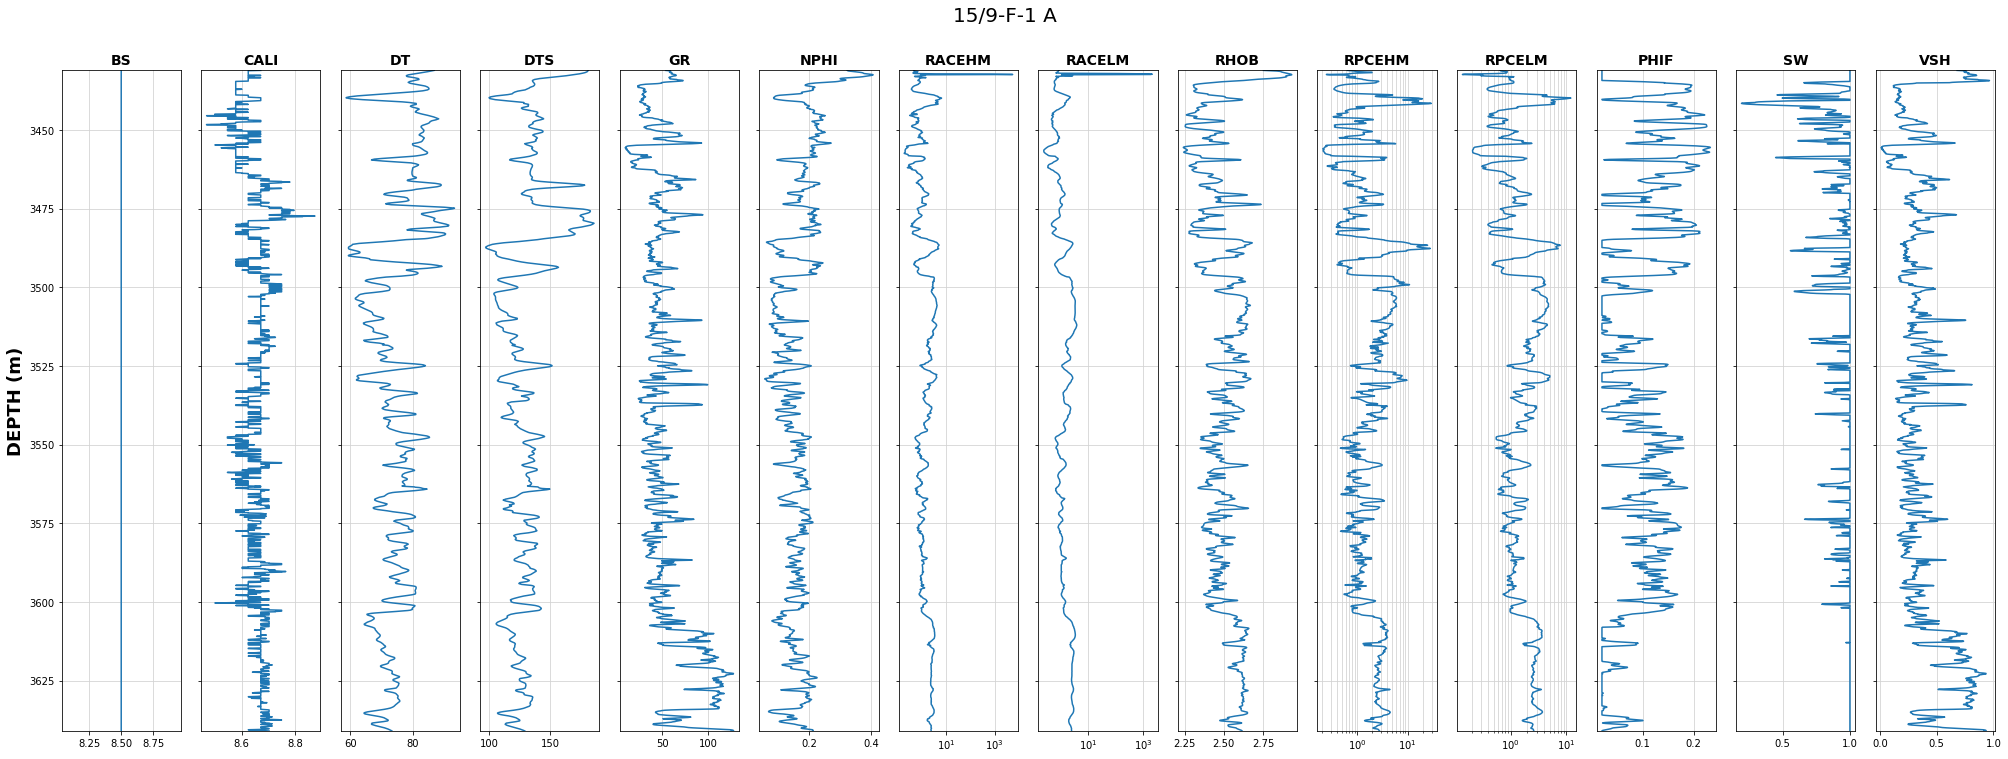

In [154]:
well = 0
create_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['MD'], logarithmic_curves)

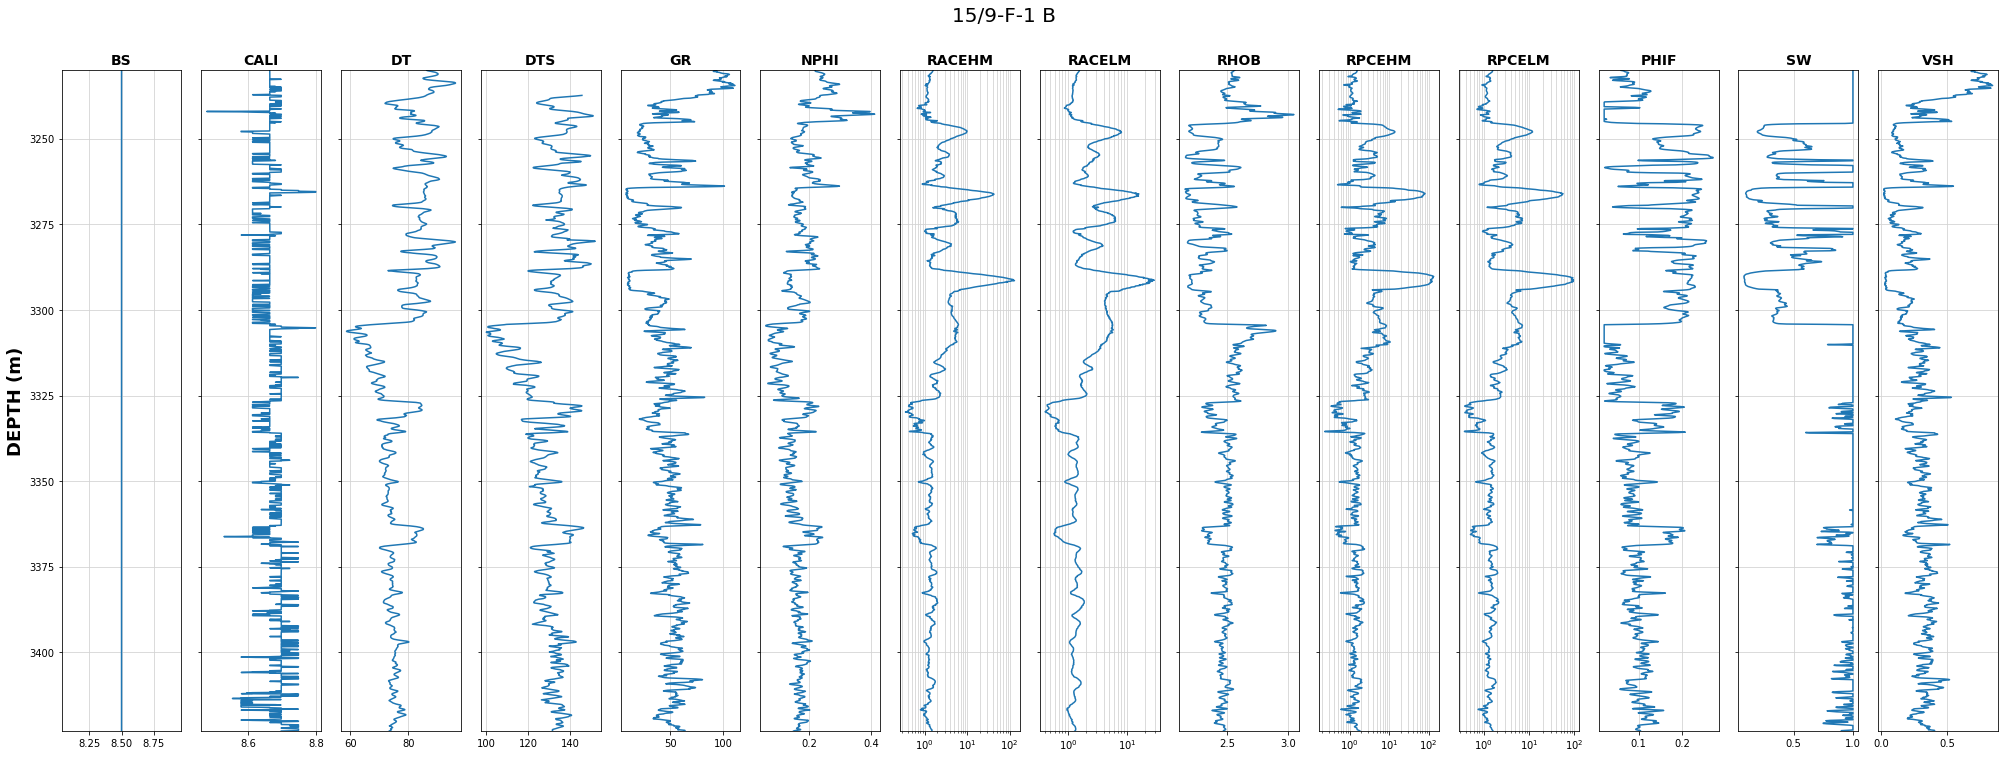

In [155]:
well = 1
create_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['MD'], logarithmic_curves)

### Standard Crossplots

In [162]:
# Create Den Neu, Ac Den and Ac Neu Xplots
import matplotlib
def make_xplot(welldata, xvar, yvar,  color, rows=1, cols=1, xscale=[0,1], yscale=[0,1], vmin=0, vmax=1):
    fig, axs = plt.subplots(rows, cols, figsize=(25,5))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
    
    for (name, welldata), ax in zip(grouped, axs.flat):
        sc = ax.scatter(x=xvar, y=yvar, data=welldata, s=5, c=color, vmin=vmin, vmax=vmax, cmap=cmap)
#         sns.scatterplot(x=xvar, y=yvar, data=welldata, hue=color, ax=ax, legend=False, palette="viridis")

        ax.set_ylim(yscale[0], yscale[1])
        ax.set_xlim(xscale[0], xscale[1])
        ax.set_ylabel(yvar)
        ax.set_xlabel(xvar)
        ax.set_title(name)
        
        fig.colorbar(sc, ax=ax)
    plt.tight_layout()
    plt.show()

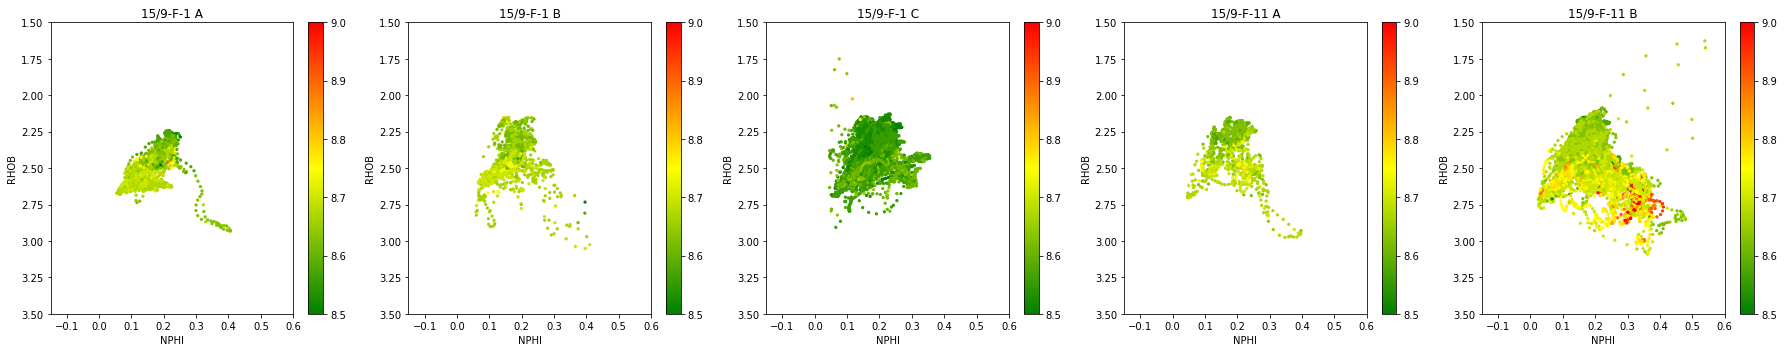

In [170]:
make_xplot(grouped, 'NPHI', 'RHOB', 'CALI', 1, 5, [-0.15, 0.6], [3.5,1.5], 8.5, 9)

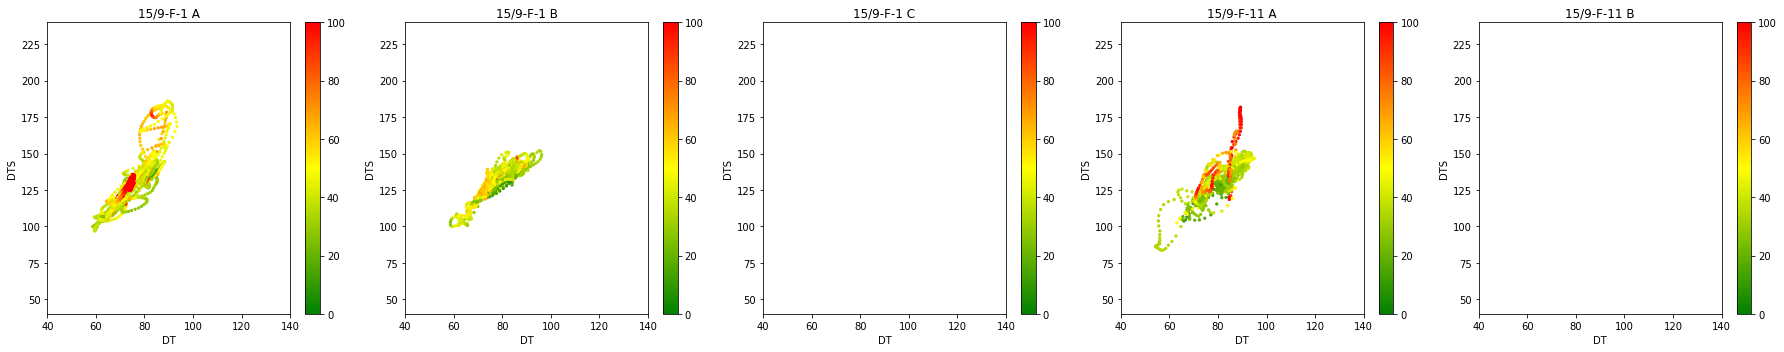

In [171]:
make_xplot(grouped, 'DT', 'DTS', 'GR', 1, 5, [40, 140], [40, 240], 0, 100)

### Seaborn Pairplot

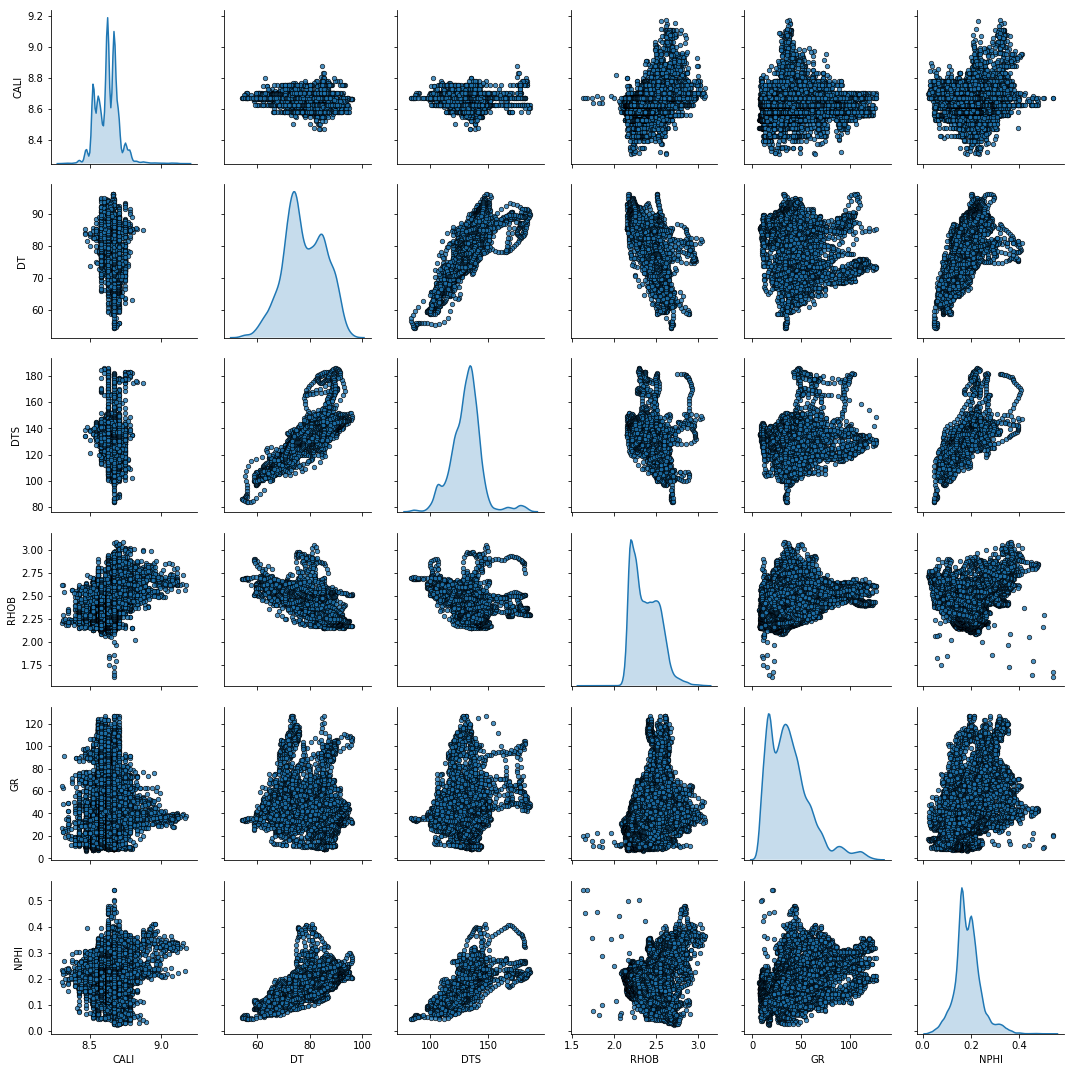

In [7]:
sns.pairplot(df, vars=['CALI', 'DT','DTS', 'RHOB', 'GR', 'NPHI'], diag_kind='kde', plot_kws = {'alpha': 0.8, 's': 20, 'edgecolor': 'k'})

### Correlation Matrix

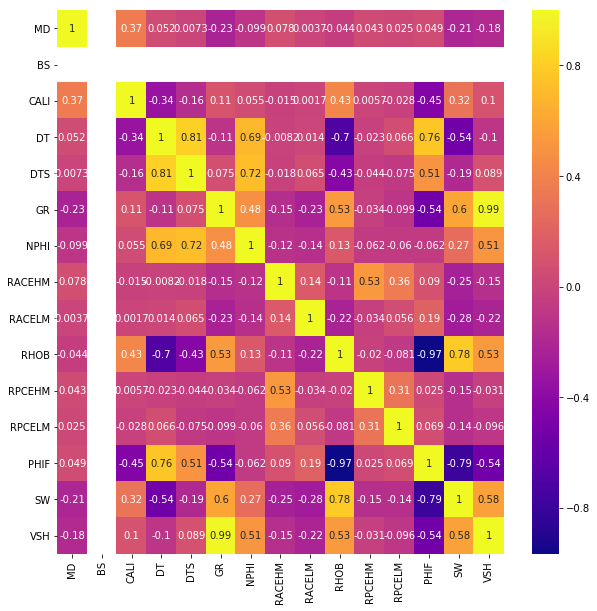

In [8]:
corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, cmap='plasma')

### Creating Working Dataset

In [29]:
# Drop BS, RPCELM and RACELM

In [30]:
# Save DF to Pickle